# Preprocessing

This file is for applying same operations on test data

In [15]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_csv('../data/test.csv')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


varible definitions at: https://www.kaggle.com/competitions/titanic/data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
category_cols = ['Pclass', 'Sex', 'SibSp', 'Parch',
                'Embarked', 'Cabin']

numeric_cols = ['Age', 'Fare']

target = 'Survived'   # There is no target in test data

discard_cols = ['PassengerId', 'Ticket', 'Name']

assert len(category_cols) + len(numeric_cols) + len(discard_cols) == data.shape[1]

In [19]:
print(data.count() / len(data))

PassengerId    1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.794258
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           0.997608
Cabin          0.217703
Embarked       1.000000
dtype: float64


In [20]:
# Cabin missing too much and is beyond repairing
if 'Cabin' in category_cols: category_cols.remove('Cabin')
discard_cols.append('Cabin')

data['Sex'].replace(to_replace='female', value=0, inplace=True)
data['Sex'].replace(to_replace='male',  value=1, inplace=True)

set(data['Embarked'])

{'C', 'Q', 'S'}

In [21]:
data['Embarked'].replace(to_replace='C', value=0, inplace=True)
data['Embarked'].replace(to_replace='Q',  value=1, inplace=True)
data['Embarked'].replace(to_replace='S',  value=2, inplace=True)

In [22]:
features = data.drop(columns=discard_cols).copy()

In [23]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


## Missing values

In [24]:
print(features.count() / len(features))

Pclass      1.000000
Sex         1.000000
Age         0.794258
SibSp       1.000000
Parch       1.000000
Fare        0.997608
Embarked    1.000000
dtype: float64


Age can be filled in by some methods

kNN is not suitable for continuous variables since K is unknown, we use 序贯热平台插补

Notice that in numpy all missing values are `np.nan`, that said, other variables might have semantically missing values, like ' ' or something else, all good here by checking the original data

In [25]:
# we can bin the Age, change it from continuous to discrete
features['Age'] = pd.cut(np.array(features['Age']), bins=5).codes
dummy_features = features.copy()
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
1,3,0,3,1,0,7.0000,2
2,2,1,4,0,0,9.6875,1
3,3,1,1,0,0,8.6625,2
4,3,0,1,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,-1,0,0,8.0500,2
414,1,0,2,0,0,108.9000,0
415,3,1,2,0,0,7.2500,2
416,3,1,-1,0,0,8.0500,2


In [26]:
print(dummy_features.corr())
print(np.sort(dummy_features.corr()['Age']))

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.108615 -0.484121  0.001087  0.018721 -0.577147  0.227983
Sex       0.108615  1.000000 -0.063315 -0.099943 -0.159120 -0.191514  0.076281
Age      -0.484121 -0.063315  1.000000 -0.003120 -0.020687  0.342065 -0.036425
SibSp     0.001087 -0.099943 -0.003120  1.000000  0.306895  0.171539  0.052708
Parch     0.018721 -0.159120 -0.020687  0.306895  1.000000  0.230046  0.054577
Fare     -0.577147 -0.191514  0.342065  0.171539  0.230046  1.000000 -0.257183
Embarked  0.227983  0.076281 -0.036425  0.052708  0.054577 -0.257183  1.000000
[-0.48412078 -0.06331514 -0.03642546 -0.02068719 -0.00311978  0.34206532
  1.        ]


Take the `absolute value` of correlation coefficient, Pclass is has the largest correlation with Age, 

plus, Pclass is full, so we take Pclass for 序贯热平台插补

> 假设我们要填特征B，特征A与B的相关性最高，我们将A按照降序进行排列，这种顺序应用到B上，然后B取特征内的上方样本的值填补缺失

In [27]:
dummy_features.sort_values('Pclass', ascending=False, inplace=True) # the order of features changes after this

for i in range(dummy_features.shape[0]):
    if i == 0 and dummy_features['Age'][i] == -1:   # if the first row is missing, take the nearest lower valid value
        for j in range(i, dummy_features.shape[0]):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
    if dummy_features['Age'][i] == -1:      # otherwise take the nearest upper valid value
        for j in range(i, -1, -1):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
dummy_features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52988\890501509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_features['Age'][i] = dummy_features['Age'][j]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
232,3,1,1,1,0,6.4958,2
249,3,0,1,1,0,14.4542,0
244,3,1,2,1,2,23.4500,2
243,3,1,2,0,0,7.8875,2
...,...,...,...,...,...,...,...
239,1,0,3,1,0,106.4250,0
158,1,1,2,0,0,26.5500,2
240,1,0,3,0,0,27.7208,0
77,1,0,3,2,0,25.7000,2


In [28]:
# change the order back
dummy_features_reset = dummy_features.reset_index()
dummy_features_reset.sort_values('index', ascending=True, inplace=True)
dummy_features_reset = dummy_features_reset.drop(columns='index')
dummy_features = dummy_features_reset.reset_index().drop(columns='index')
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
1,3,0,3,1,0,7.0000,2
2,2,1,4,0,0,9.6875,1
3,3,1,1,0,0,8.6625,2
4,3,0,1,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,2
414,1,0,2,0,0,108.9000,0
415,3,1,2,0,0,7.2500,2
416,3,1,2,0,0,8.0500,2


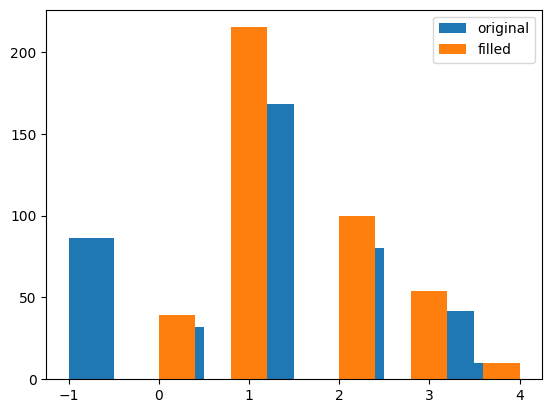

In [29]:
from matplotlib import pyplot as plt

plt.hist(features['Age'], label="original")
plt.hist(dummy_features['Age'], label="filled")
plt.legend()

And that's for *Age*, now for *Embarked*, there are 2 missing values, ~~just drop these 2 rows~~

**Caution**: dropping the rows leaves un-continuous row index in pandas, e.g. 0, 1, 3, 5, 6, 7, ..., errors might happen when using pd.concat(), which is based on row index

you can reset the row index by
```python
    dummy_features = dummy_features.reset_index().drop(columns='index')
```

but what about the labels? Delete which rows for y? It's troublesome, so just fill the missing values for *Embarked*

In [30]:
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int8   
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5), int8(1)
memory usage: 20.1 KB


<mark>One question: the missing values in test set should be filled with training set or test set?</mark>

- If test set: Same rules as training set

- If training set: so proiri on test set, presumably more reasonable?

<mark>One most fundamental principle is never doing calculations on test data since they should be treated as if not existed!</mark>

(from Internet: )

> Build a transformation pipeline that can handle all the necessary preprocessing steps (impute missing data, standardize, perform desired feature engineering, dimensionality reduction...) on training set and when a new observation comes (we should treat test set as just a new observations that are unavailable during training) apply this pipeline transformations on that new data.

In [33]:
for i in range(dummy_features.shape[0]):
    if(np.isnan(dummy_features['Fare'][i])):
        dummy_features['Fare'][i] = dummy_features['Fare'].mean()
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int8   
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5), int8(1)
memory usage: 20.1 KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_52988\1585715768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_features['Fare'][i] = dummy_features['Fare'].mean()


In [34]:
dummy_features.to_csv('../data/X_test_preprocessed.csv', index=False)

# 👆 STOP HERE -----------

下面的懒得删了

In [162]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit(features_temp)

CrossComb_cols = features_temp.columns[sel.variances_ > 0.01 * 0.99]
CrossComb_cols

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass&Sex_1&0', 'Pclass&Sex_1&1', 'Pclass&Sex_2&0',
       ...
       'SibSp&Embarked_2&2.0', 'SibSp&Embarked_3&2.0', 'SibSp&Embarked_4&2.0',
       'Parch&Embarked_0&0.0', 'Parch&Embarked_0&1.0', 'Parch&Embarked_0&2.0',
       'Parch&Embarked_1&0.0', 'Parch&Embarked_1&2.0', 'Parch&Embarked_2&0.0',
       'Parch&Embarked_2&2.0'],
      dtype='object', length=138)

- Chi squared test

In [163]:
features_temp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass&Sex_1&0,Pclass&Sex_1&1,Pclass&Sex_2&0,...,Parch&Embarked_1&2.0,Parch&Embarked_2&0.0,Parch&Embarked_2&1.0,Parch&Embarked_2&2.0,Parch&Embarked_3&0.0,Parch&Embarked_3&2.0,Parch&Embarked_4&2.0,Parch&Embarked_5&1.0,Parch&Embarked_5&2.0,Parch&Embarked_6&2.0
0,3,1,1,1,0,7.2500,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2,1,0,71.2833,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,1,0,0,7.9250,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,1,0,53.1000,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,2,0,0,8.0500,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,13.0000,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1,0,1,0,0,30.0000,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,3,0,1,1,2,23.4500,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1,1,1,0,0,30.0000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:

print(np.where(features_temp[CrossComb_cols] < 0))


(array([], dtype=int64), array([], dtype=int64))


In [165]:
from sklearn.feature_selection import chi2

chi2_p = chi2(features_temp[CrossComb_cols], labels)[1]

chi2_CrossComb_cols = []

for pValue, colname in zip(chi2_p, CrossComb_cols):
    if pValue < 0.01:
        chi2_CrossComb_cols.append(colname)

print(len(chi2_CrossComb_cols))

69


- Mutual Information

In [166]:
from sklearn.feature_selection import mutual_info_classif

MI = mutual_info_classif(features_temp[CrossComb_cols], labels, discrete_features=True, random_state=22)

MI_threshold = MI.mean() * 0.1

MI_CrossComb_cols = []

for MIvalue, colname in zip(MI, CrossComb_cols):
    if MIvalue > MI_threshold:
        MI_CrossComb_cols.append(colname)

print(len(MI_CrossComb_cols))    

89


d:\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [167]:
set(chi2_CrossComb_cols) & set(MI_CrossComb_cols)

CrossComb_cols_select = list(set(chi2_CrossComb_cols) & set(MI_CrossComb_cols))

len(CrossComb_cols_select)

69

In [168]:
features_temp_cb = features_temp[CrossComb_cols_select]
features_temp_cb.columns

Index(['Pclass&SibSp_3&0', 'Pclass&Parch_1&2', 'Sex&SibSp_0&0',
       'Pclass&Sex_2&1', 'Sex&Embarked_0&1.0', 'Fare', 'Pclass&Sex_3&1',
       'SibSp&Embarked_0&2.0', 'Parch&Embarked_0&2.0', 'Pclass&Embarked_1&2.0',
       'Pclass&Parch_2&2', 'Sex&SibSp_0&2', 'Pclass&Sex_1&0',
       'Pclass&Parch_1&1', 'Pclass&SibSp_2&1', 'Sex&Age_1&1',
       'Pclass&SibSp_1&1', 'Pclass&Age_3&2', 'Sex&Age_0&2', 'Sex&SibSp_1&0',
       'Sex&Parch_1&0', 'Sex&Embarked_1&1.0', 'Age&Parch_1&0', 'Sex&Age_1&2',
       'SibSp&Embarked_1&2.0', 'Pclass&Embarked_3&2.0', 'Sex&Age_0&3',
       'Embarked', 'Pclass&Age_3&1', 'Pclass&Parch_1&0', 'Sex&Age_1&3',
       'Sex&Embarked_0&0.0', 'Age&SibSp_0&0', 'Age&Embarked_1&2.0',
       'SibSp&Parch_0&2', 'Pclass&Age_2&0', 'Sex&SibSp_0&1', 'Sex',
       'Sex&Parch_0&1', 'Pclass&Sex_2&0', 'Pclass&Embarked_1&0.0',
       'Sex&Age_0&0', 'Pclass&Age_1&1', 'Pclass&Age_1&2', 'Pclass',
       'Pclass&SibSp_1&0', 'Age&Embarked_1&0.0', 'Sex&Age_0&1',
       'SibSp&Parch_1&1', 

In [169]:
features_temp_cb.to_csv('../data/X_train_CrossComb.csv', index=False)

## Polynomial combination

The polynomial combination only applies to continuous variables and between seemingly meaningful variables

In [170]:
numeric_cols

['Age', 'Fare']

only 'Fare' seems to be slightly meaningful for polynomial derivation

And at least two continuous variables are required to do the polynomial derivation, this part is cancled out

## Grouping features derivation

In [171]:
from sklearn.preprocessing import OrdinalEncoder

In [172]:
features.info()
print(category_cols)
print(numeric_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
['Age', 'Fare']


Reasonably, Grouping derivations only happen on categorical variables.

we do one-hot encoding first

In [194]:
ord_enc = OrdinalEncoder()
ord_enc.fit(features[category_cols])

X_train_OE = pd.DataFrame(ord_enc.transform(features[category_cols]), columns=category_cols)
X_train_OE.index = features.index
X_train_OE = pd.concat([X_train_OE, features[numeric_cols]], axis=1)

X_test_OE = pd.DataFrame(ord_enc.transform(X_test[category_cols]), columns=category_cols)
X_test_OE.index = X_test.index
X_test_OE = pd.concat([X_test_OE, X_test[numeric_cols]], axis=1)

In [195]:
X_train_OE

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,2.0,1.0,1.0,0.0,2.0,1,7.2500
1,0.0,0.0,1.0,0.0,0.0,2,71.2833
2,2.0,0.0,0.0,0.0,2.0,1,7.9250
3,0.0,0.0,1.0,0.0,2.0,2,53.1000
4,2.0,1.0,0.0,0.0,2.0,2,8.0500
...,...,...,...,...,...,...,...
886,1.0,1.0,0.0,0.0,2.0,1,13.0000
887,0.0,0.0,0.0,0.0,2.0,1,30.0000
888,2.0,0.0,1.0,2.0,2.0,1,23.4500
889,0.0,1.0,0.0,0.0,0.0,1,30.0000


- find **keyCols**

In [179]:
chi2_p = chi2(X_train_OE[category_cols], labels)[1]

chi2_select_cols = []

for pValue, colname in zip(chi2_p, category_cols):
    if pValue < 0.01:
        chi2_select_cols.append(colname)

print(len(chi2_select_cols))
chi2_select_cols

4


['Pclass', 'Sex', 'Parch', 'Embarked']

In [181]:
MI = mutual_info_classif(X_train_OE[category_cols], labels, discrete_features=True, random_state=22)
MI

array([0.05810725, 0.15087049, 0.02319709, 0.01636558, 0.01423325])

In [182]:
MI_select_cols = []
MI_threshold = MI.mean() * 0.1

for MIvalue, colname in zip(MI, category_cols):
    if MIvalue > MI_threshold:
        MI_select_cols.append(colname)

print(len(MI_select_cols))        
MI_select_cols

5


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

keyCols are the intersection of the columns selected by Squared Variance and Mutual Information

Based on these columns, we will generate new features by grouping methods

In [191]:
keycols = list(set(chi2_select_cols) & set(MI_select_cols))
keycols

['Parch', 'Pclass', 'Sex', 'Embarked']

In [192]:
cat_rest = []   # categorical variables that are not keyCols

for col in category_cols:
    if col not in keycols:
        cat_rest.append(col)

cat_rest

['SibSp']

In [203]:
def Binary_Group_Statistics(keyCol, 
                            features, 
                            col_num=None, 
                            col_cat=None, 
                            num_stat=['mean', 'var', 'max', 'min', 'skew', 'median'], 
                            cat_stat=['mean', 'var', 'max', 'min', 'median', 'count', 'nunique'], 
                            quant=True):
    """
    双变量分组统计特征衍生函数
    
    :param keyCol: 分组参考的关键变量
    :param features: 原始数据集
    :param col_num: 参与衍生的连续型变量
    :param col_cat: 参与衍生的离散型变量
    :param num_stat: 连续变量分组统计量
    :param cat_num: 离散变量分组统计量  
    :param quant: 是否计算分位数  

    :return: 交叉衍生后的新特征和新特征的名称
    """
    
    # 当输入的特征有连续型特征时
    if col_num != None:
        aggs_num = {}
        colNames = col_num
        
        # 创建agg方法所需字典
        for col in col_num:
            aggs_num[col] = num_stat 
            
        # 创建衍生特征名称列表
        cols_num = [keyCol]
        for key in aggs_num.keys():
            cols_num.extend([key+'_'+keyCol+'_'+stat for stat in aggs_num[key]])
            
        # 创建衍生特征df
        features_num_new = features[col_num+[keyCol]].groupby(keyCol).agg(aggs_num).reset_index()
        features_num_new.columns = cols_num 
        
        # 当输入的特征有连续型也有离散型特征时
        if col_cat != None:        
            aggs_cat = {}
            colNames = col_num + col_cat

            # 创建agg方法所需字典
            for col in col_cat:
                aggs_cat[col] = cat_stat

            # 创建衍生特征名称列表
            cols_cat = [keyCol]
            for key in aggs_cat.keys():
                cols_cat.extend([key+'_'+keyCol+'_'+stat for stat in aggs_cat[key]])    

            # 创建衍生特征df
            features_cat_new = features[col_cat+[keyCol]].groupby(keyCol).agg(aggs_cat).reset_index()
            features_cat_new.columns = cols_cat
    
            # 合并连续变量衍生结果与离散变量衍生结果
            df_temp = pd.merge(features_num_new, features_cat_new, how='left',on=keyCol)
            features_new = pd.merge(features[keyCol], df_temp, how='left',on=keyCol)
            features_new.loc[:, ~features_new.columns.duplicated()]
            colNames_new = cols_num + cols_cat
            colNames_new.remove(keyCol)
            colNames_new.remove(keyCol)
         
        # 当只有连续变量时
        else:
            # merge连续变量衍生结果与原始数据，然后删除重复列
            features_new = pd.merge(features[keyCol], features_num_new, how='left',on=keyCol)
            features_new.loc[:, ~features_new.columns.duplicated()]
            colNames_new = cols_num
            colNames_new.remove(keyCol)
    
    # 当没有输入连续变量时
    else:
        # 但存在分类变量时，即只有分类变量时
        if col_cat != None:
            aggs_cat = {}
            colNames = col_cat

            for col in col_cat:
                aggs_cat[col] = cat_stat

            cols_cat = [keyCol]
            for key in aggs_cat.keys():
                cols_cat.extend([key+'_'+keyCol+'_'+stat for stat in aggs_cat[key]])    

            features_cat_new = features[col_cat+[keyCol]].groupby(keyCol).agg(aggs_cat).reset_index()
            features_cat_new.columns = cols_cat            
             
            features_new = pd.merge(features[keyCol], features_cat_new, how='left',on=keyCol)
            features_new.loc[:, ~features_new.columns.duplicated()]
            colNames_new = cols_cat
            colNames_new.remove(keyCol) 
    
    if quant:
        # 定义四分位计算函数
        def q1(x):
            """
            下四分位数
            """
            return x.quantile(0.25)

        def q2(x):
            """
            上四分位数
            """
            return x.quantile(0.75)

        aggs = {}
        for col in colNames:
            aggs[col] = ['q1', 'q2']

        cols = [keyCol]
        for key in aggs.keys():
            cols.extend([key+'_'+keyCol+'_'+stat for stat in aggs[key]])    

        aggs = {}
        for col in colNames:
            aggs[col] = [q1, q2]    

        features_temp = features[colNames+[keyCol]].groupby(keyCol).agg(aggs).reset_index()
        features_temp.columns = cols

        features_new = pd.merge(features_new, features_temp, how='left',on=keyCol)
        features_new.loc[:, ~features_new.columns.duplicated()]
        colNames_new = colNames_new + cols
        colNames_new.remove(keyCol)     
    
    features_new.drop([keyCol], axis=1, inplace=True)
        
    return features_new, colNames_new


In [204]:
# 创建容器
col_temp = keycols.copy()
GroupStat_train = pd.DataFrame()
GroupStat_test = pd.DataFrame()

for i in range(len(col_temp)):
    keyCol = col_temp.pop(i)
    features_new, colNames_new = Binary_Group_Statistics(keyCol,X_train_OE, numeric_cols, col_temp+cat_rest)
    
    GroupStat_train = pd.concat([GroupStat_train, features_new], axis=1)
    
    col_temp = keycols.copy()

In [205]:
GroupStat_train.head()

,Age_Parch_mean,Age_Parch_var,Age_Parch_max,Age_Parch_min,Age_Parch_skew,Age_Parch_median,Fare_Parch_mean,Fare_Parch_var,Fare_Parch_max,Fare_Parch_min,...,Fare_Embarked_q1,Fare_Embarked_q2,Parch_Embarked_q1,Parch_Embarked_q2,Pclass_Embarked_q1,Pclass_Embarked_q2,Sex_Embarked_q1,Sex_Embarked_q2,SibSp_Embarked_q1,SibSp_Embarked_q2
0,1.474926,0.704688,4,0,0.680305,1.0,25.586774,1753.832734,512.3292,0.0,...,8.05000,27.900000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0
1,1.474926,0.704688,4,0,0.680305,1.0,25.586774,1753.832734,512.3292,0.0,...,13.69795,78.500025,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
2,1.474926,0.704688,4,0,0.680305,1.0,25.586774,1753.832734,512.3292,0.0,...,8.05000,27.900000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0
3,1.474926,0.704688,4,0,0.680305,1.0,25.586774,1753.832734,512.3292,0.0,...,8.05000,27.900000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0
4,1.474926,0.704688,4,0,0.680305,1.0,25.586774,1753.832734,512.3292,0.0,...,8.05000,27.900000,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0


- Squared variance filtering

In [206]:
sel = VarianceThreshold()
sel.fit(GroupStat_train)

GroupStat_cols = list(GroupStat_train.columns[sel.variances_ > 0])
len(GroupStat_cols)

134

74 newly created features have been removed, now we still have 134 added features

- Squared variance analysis

⚠️Here we are running into another numpy bug: **can't recognize nan sometimes**

we have to process it first

In [230]:
temp_df = GroupStat_train[GroupStat_cols]

False


In [280]:
# find out there appears a bug again
print(temp_df.iloc[:, 1][678])
print(type(temp_df.iloc[:, 1][678]))

# these methods don't work
print(np.where(temp_df is np.nan))
print(np.nan in temp_df)
print(temp_df.iloc[:, 1][678] is np.nan)
print(np.nan in temp_df)

# only np.isnan() works
print(np.isnan(temp_df.iloc[:, 1][678]))

nan
<class 'numpy.float64'>
(array([], dtype=int64),)
False
False
False
True


In [285]:
# visit all elements and replace missing values with modes
for j in range(temp_df.shape[1]):
    for i in range(temp_df.shape[0]):
        if np.isnan(temp_df.iloc[i, j]):
            temp_df.iloc[i, j] = temp_df.iloc[:, j].mode()

In [286]:
from sklearn.feature_selection import f_classif

f_classif_p = f_classif(temp_df, labels)[1]

👆 and now f_classif works normally

In [287]:
f_classif_GroupStat_cols = []

for pValue, colname in zip(f_classif_p, GroupStat_cols):
    if pValue < 0.01:
        f_classif_GroupStat_cols.append(colname)

print(len(f_classif_GroupStat_cols))    # columns remained

110


- Mutual information

In [288]:
MI = mutual_info_classif(temp_df, labels, random_state=22)
MI

array([0.03218011, 0.03383418, 0.00931954, 0.01927295, 0.03821737,
       0.02463115, 0.02217277, 0.01222021, 0.00203628, 0.        ,
       0.006559  , 0.03125353, 0.        , 0.01465276, 0.00342061,
       0.01955619, 0.00077367, 0.00363642, 0.        , 0.        ,
       0.        , 0.02129894, 0.01531642, 0.        , 0.        ,
       0.0202383 , 0.01741911, 0.02671419, 0.        , 0.01979933,
       0.00829346, 0.01493471, 0.        , 0.        , 0.04824064,
       0.        , 0.03339564, 0.        , 0.0063557 , 0.        ,
       0.        , 0.        , 0.02518296, 0.00110746, 0.0254018 ,
       0.06951496, 0.0319847 , 0.04247276, 0.00380067, 0.07084057,
       0.05573353, 0.05539723, 0.07990707, 0.09885441, 0.07039147,
       0.06821805, 0.05848007, 0.07080313, 0.05423297, 0.040501  ,
       0.0688471 , 0.05819039, 0.06373278, 0.04777737, 0.0591638 ,
       0.05040265, 0.03949505, 0.05873465, 0.06085943, 0.05877199,
       0.0564063 , 0.0730965 , 0.02350305, 0.06964797, 0.15598

In [289]:
MI_threshold = MI.mean() * 0.1  # take 0.1 mean as the threshold
MI_threshold

0.005321163616845657

In [290]:
MI_GroupStat_cols = []

for MIvalue, colname in zip(MI, GroupStat_cols):
    if MIvalue > MI_threshold:
        MI_GroupStat_cols.append(colname)

print(len(MI_GroupStat_cols))        

106


Again, take interstection of squared variance analysis and MI as final result

In [291]:
GroupStat_cols_select = list(set(f_classif_GroupStat_cols) & set(MI_GroupStat_cols))
len(GroupStat_cols_select)

95

In [292]:
temp_df[GroupStat_cols_select].to_csv('../data/X_train_GroupStat.csv', index=False)

# Targeted encoding